## Imports

In [1]:
import os
import sys
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_context('talk')
sns.set_style('whitegrid')

from sklearn import linear_model

In [2]:
os.chdir('/home/jtao/for_fun/fantasy_football/')

## Read in Rankings

In [3]:
rankings_2016 = pd.read_csv('./FantasyPros_2016_Draft_Overall_Rankings.txt', sep='\t')
rankings_2016['Player'] = rankings_2016['Player'].values + ', ' + rankings_2016['Team'].str.upper()
rankings_2017 = pd.read_csv('./FantasyPros_2017_Draft_Overall_Rankings.txt', sep='\t')
rankings_2017['Player'] = rankings_2017['Player'].values + ', ' + rankings_2017['Team'].str.upper()

## Draft Order

/gpfs/data01/glasslab/home/jtao/software/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


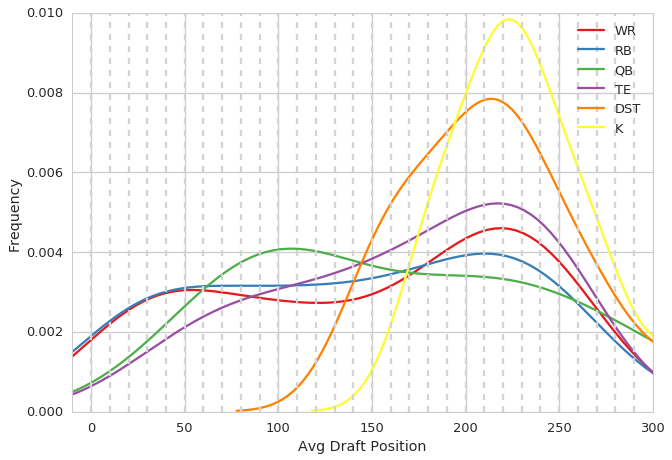

In [4]:
positions = ['WR', 'RB', 'QB', 'TE', 'DST', 'K']
sns.set_palette('Set1')
for pos in positions:
    pos_rankings = rankings_2017[rankings_2017['Pos'] == pos]['Avg']
    sns.kdeplot(pos_rankings, label=pos, )
    plt.legend()
plt.xlim(-10,300)
sns.set_palette('Set1')
plt.ylabel('Frequency')
plt.xlabel('Avg Draft Position')

for i in range(0,300,10):
    plt.axvline(ymin=0, ymax=1, x=i, c='lightgrey', linestyle ='--')

/gpfs/data01/glasslab/home/jtao/software/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


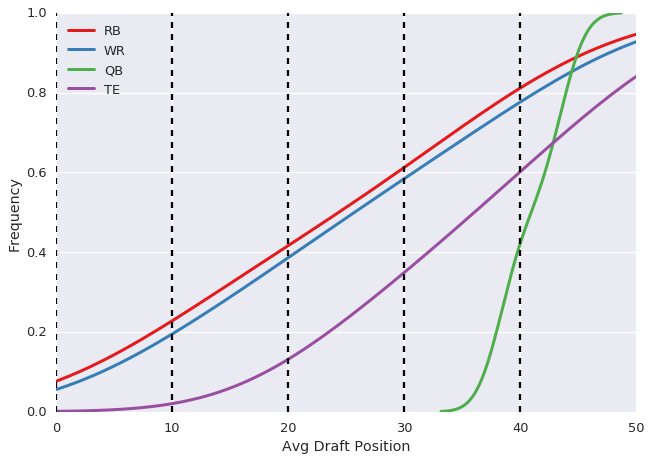

In [5]:
sns.set_style('darkgrid')
positions = ['RB', 'WR', 'QB', 'TE']
sns.set_palette('Set1')
for pos in positions:
    pos_rankings = rankings_2017[(rankings_2017['Pos'] == pos) &
                                 (rankings_2017['Avg'] <=50)]['Avg']
    sns.kdeplot(pos_rankings, label=pos, cumulative=True, linewidth=3)
    ax = plt.gca()
plt.legend(loc=0)
plt.xlim(0,50)
sns.set_palette('Set1')
plt.ylabel('Frequency')
plt.xlabel('Avg Draft Position')

for i in range(0,50,10):
    plt.axvline(ymin=0, ymax=1, x=i, c='black', linestyle ='--')

## Read in 2016 Performance Data

In [6]:
frame_qb = pd.read_csv('./2016_qb.txt', sep='\t')
frame_rb = pd.read_csv('./2016_rb.txt', sep='\t')
frame_wr = pd.read_csv('./2016_wr.txt', sep='\t')
frame_te = pd.read_csv('./2016_te.txt', sep='\t')
frame_def = pd.read_csv('./2016_defense.txt', sep='\t')
frame_k = pd.read_csv('./2016_kickers.txt', sep='\t')

for f in [frame_qb, frame_rb, frame_wr, frame_te, frame_def, frame_k]:
    vals = f['Player'].values

    teams = [x.split(', ')[1].upper() for x in vals]
    players = [x.split(', ')[0] for x in vals]
    f['Team'] = teams
    f['Player'] = [x.split(', ')[0] + ', ' + x.split(', ')[1].upper() for x in vals]

In [7]:
player_points_dict = {}
for f in [frame_qb, frame_rb, frame_wr, frame_te, frame_def, frame_k]:
    for tup in list(zip(f['Player'].values, f['Points'].values)):
        player_points_dict[tup[0]] = tup[1]
player_rank_dict = {}
for tup in list(zip(rankings_2016['Player'].values, rankings_2016['Avg'].values)):
    player_rank_dict[tup[0]] = tup[1]

### All Players

/gpfs/data01/glasslab/home/jtao/software/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


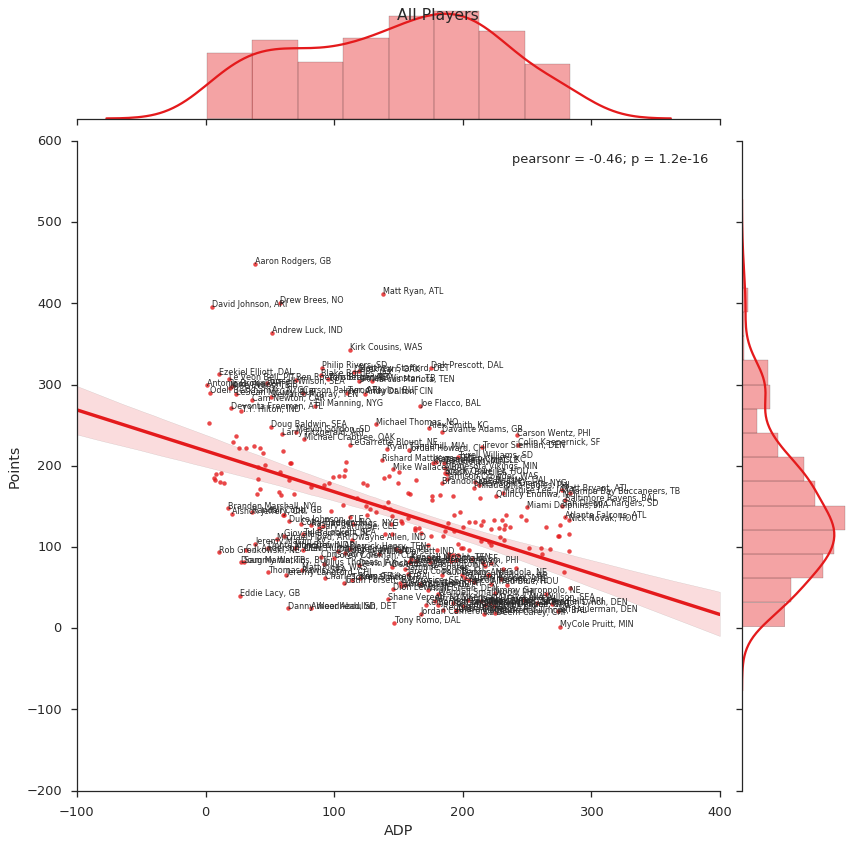

In [8]:
sns.set_style('ticks')
threshold = 50
players = [x for x in player_rank_dict if x in player_points_dict]
points = pd.Series([player_points_dict[x] for x in players])
ranks = pd.Series([player_rank_dict[x] for x in players])

reg = linear_model.LinearRegression()
reg.fit(ranks.reshape((len(players), 1)), points.reshape((len(players), 1)))

jg = sns.jointplot(ranks, points, kind = 'reg', size=12)

for i in range(len(ranks)):
    r = ranks[i]
    p = points[i]
    player = players[i]
    predicted_p = reg.predict(r)
    if abs(p - predicted_p) > threshold:
        jg.ax_joint.annotate(xy=(r,p), s=player, size=8)
jg.ax_joint.set_xlabel('ADP')
plt.ylabel('Points')
plt.suptitle('All Players')

### QBs

/gpfs/data01/glasslab/home/jtao/software/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


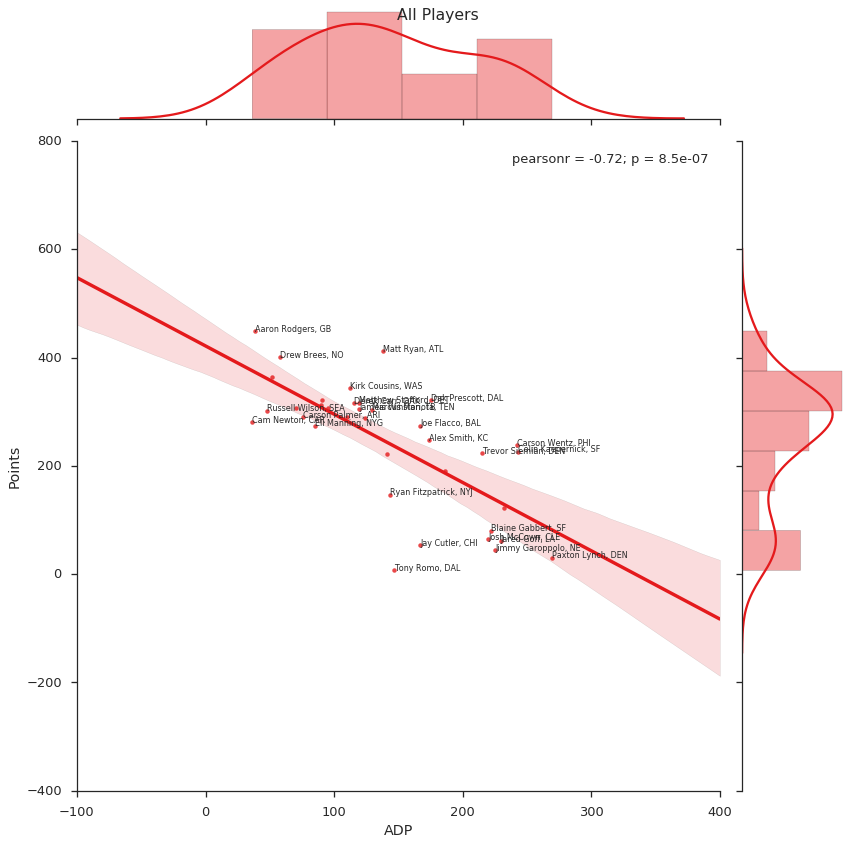

In [9]:
sns.set_style('ticks')
threshold = 32
players = [x for x in player_rank_dict if x in player_points_dict and x in frame_qb['Player'].values]
points = pd.Series([player_points_dict[x] for x in players])
ranks = pd.Series([player_rank_dict[x] for x in players])

reg = linear_model.LinearRegression()
reg.fit(ranks.reshape((len(players), 1)), points.reshape((len(players), 1)))

jg = sns.jointplot(ranks, points, kind = 'reg', size=12)

for i in range(len(ranks)):
    r = ranks[i]
    p = points[i]
    player = players[i]
    predicted_p = reg.predict(r)
    if abs(p - predicted_p) > threshold:
        jg.ax_joint.annotate(xy=(r,p), s=player, size=8)
jg.ax_joint.set_xlabel('ADP')
plt.ylabel('Points')
plt.suptitle('All Players')

### Running Back

/gpfs/data01/glasslab/home/jtao/software/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


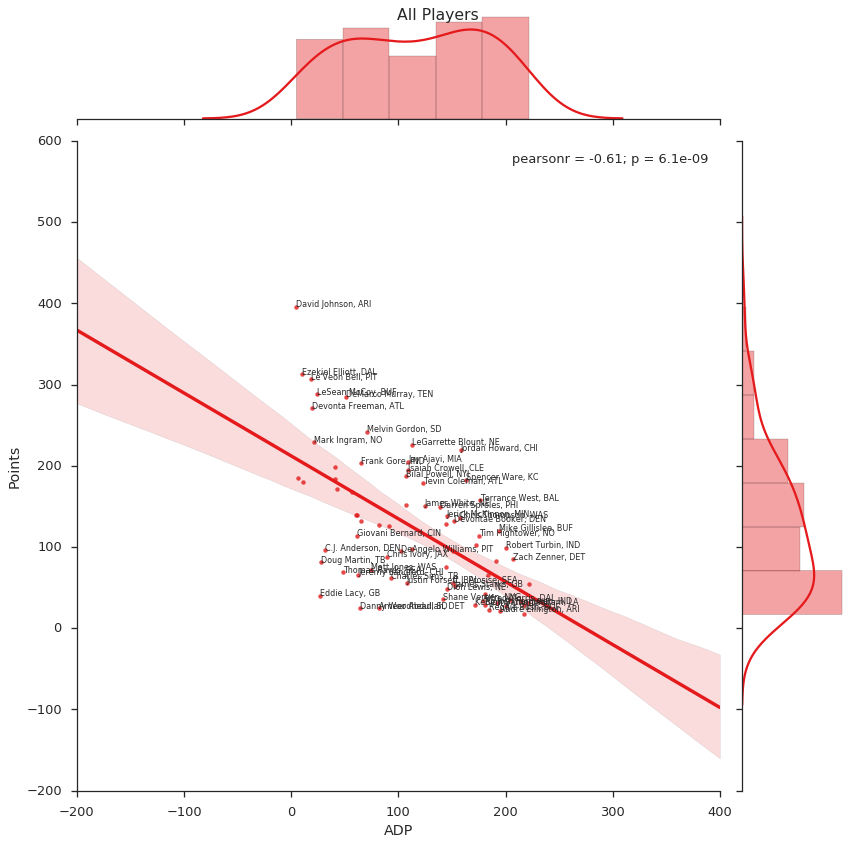

In [10]:
sns.set_style('ticks')
threshold = 32
players = [x for x in player_rank_dict if x in player_points_dict and x in frame_rb['Player'].values]
points = pd.Series([player_points_dict[x] for x in players])
ranks = pd.Series([player_rank_dict[x] for x in players])

reg = linear_model.LinearRegression()
reg.fit(ranks.reshape((len(players), 1)), points.reshape((len(players), 1)))

jg = sns.jointplot(ranks, points, kind = 'reg', size=12)

for i in range(len(ranks)):
    r = ranks[i]
    p = points[i]
    player = players[i]
    predicted_p = reg.predict(r)
    if abs(p - predicted_p) > threshold:
        jg.ax_joint.annotate(xy=(r,p), s=player, size=8)
jg.ax_joint.set_xlabel('ADP')
plt.ylabel('Points')
plt.suptitle('All Players')

### Wide Receivers

/gpfs/data01/glasslab/home/jtao/software/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


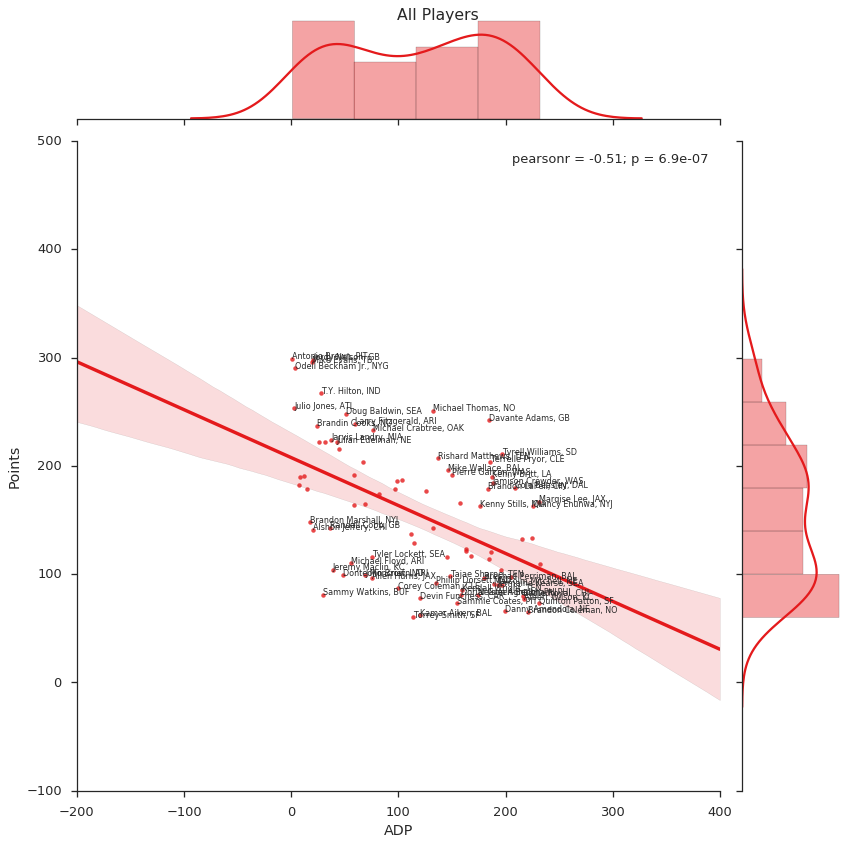

In [11]:
sns.set_style('ticks')
threshold = 32
players = [x for x in player_rank_dict if x in player_points_dict and x in frame_wr['Player'].values]
points = pd.Series([player_points_dict[x] for x in players])
ranks = pd.Series([player_rank_dict[x] for x in players])

reg = linear_model.LinearRegression()
reg.fit(ranks.reshape((len(players), 1)), points.reshape((len(players), 1)))

jg = sns.jointplot(ranks, points, kind = 'reg', size=12)

for i in range(len(ranks)):
    r = ranks[i]
    p = points[i]
    player = players[i]
    predicted_p = reg.predict(r)
    if abs(p - predicted_p) > threshold:
        jg.ax_joint.annotate(xy=(r,p), s=player, size=8)
jg.ax_joint.set_xlabel('ADP')
plt.ylabel('Points')
plt.suptitle('All Players')

### Tight Ends

/gpfs/data01/glasslab/home/jtao/software/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


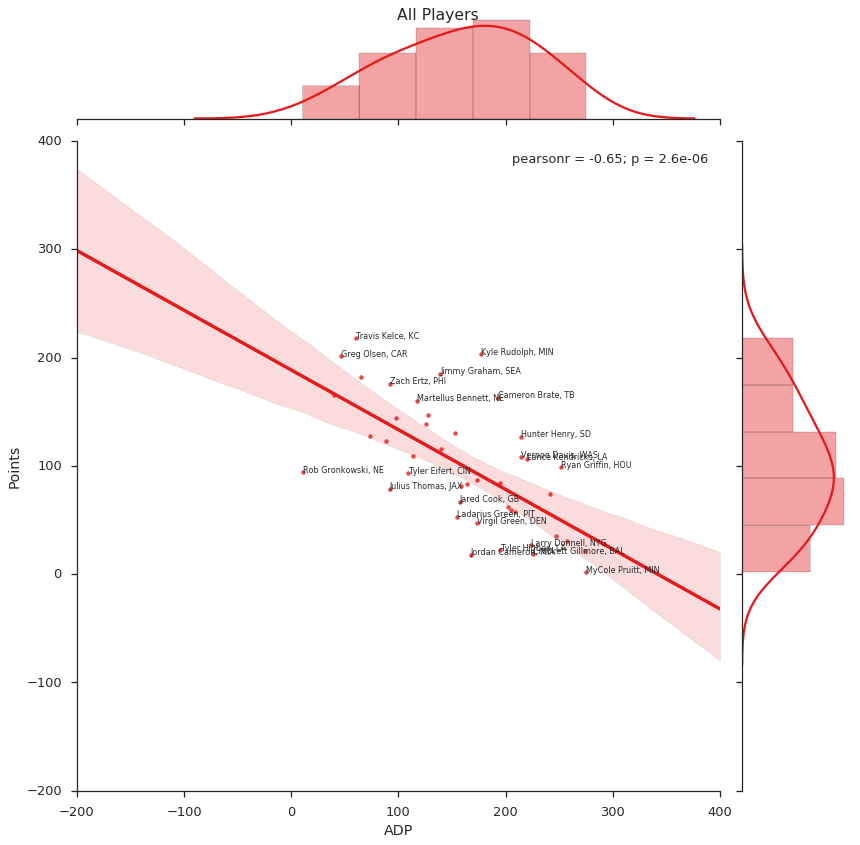

In [12]:
sns.set_style('ticks')
threshold = 32
players = [x for x in player_rank_dict if x in player_points_dict and x in frame_te['Player'].values]
points = pd.Series([player_points_dict[x] for x in players])
ranks = pd.Series([player_rank_dict[x] for x in players])

reg = linear_model.LinearRegression()
reg.fit(ranks.reshape((len(players), 1)), points.reshape((len(players), 1)))

jg = sns.jointplot(ranks, points, kind = 'reg', size=12)

for i in range(len(ranks)):
    r = ranks[i]
    p = points[i]
    player = players[i]
    predicted_p = reg.predict(r)
    if abs(p - predicted_p) > threshold:
        jg.ax_joint.annotate(xy=(r,p), s=player, size=8)
jg.ax_joint.set_xlabel('ADP')
plt.ylabel('Points')
plt.suptitle('All Players')

### Defense

/gpfs/data01/glasslab/home/jtao/software/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


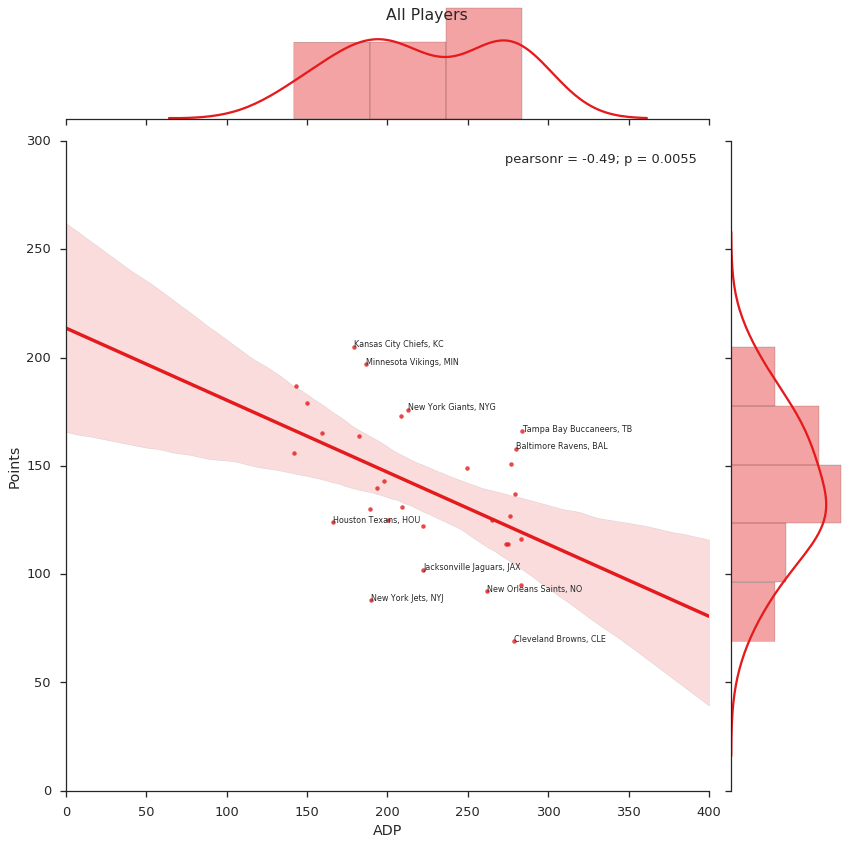

In [13]:
sns.set_style('ticks')
threshold = 32
players = [x for x in player_rank_dict if x in player_points_dict and x in frame_def['Player'].values]
points = pd.Series([player_points_dict[x] for x in players])
ranks = pd.Series([player_rank_dict[x] for x in players])

reg = linear_model.LinearRegression()
reg.fit(ranks.reshape((len(players), 1)), points.reshape((len(players), 1)))

jg = sns.jointplot(ranks, points, kind = 'reg', size=12)

for i in range(len(ranks)):
    r = ranks[i]
    p = points[i]
    player = players[i]
    predicted_p = reg.predict(r)
    if abs(p - predicted_p) > threshold:
        jg.ax_joint.annotate(xy=(r,p), s=player, size=8)
jg.ax_joint.set_xlabel('ADP')
plt.ylabel('Points')
plt.suptitle('All Players')

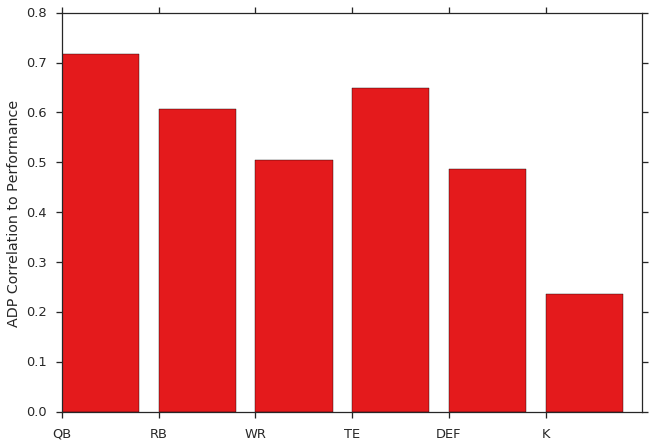

In [14]:
correlations = []
for f in [frame_qb, frame_rb, frame_wr, frame_te, frame_def, frame_k]:
    players = [x for x in player_rank_dict if x in player_points_dict and x in f['Player'].values]
    points = [player_points_dict[x] for x in players]
    ranks = [player_rank_dict[x] for x in players]
    p, pval = scipy.stats.pearsonr(points, ranks)
    correlations.append(-p)
correlations
plt.bar(range(1, len(correlations) + 1), correlations)
plt.xticks(range(1,7), ['QB', 'RB', 'WR', 'TE', 'DEF', 'K'])
plt.ylabel('ADP Correlation to Performance')

### Points Per Rank

/gpfs/data01/glasslab/home/jtao/software/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


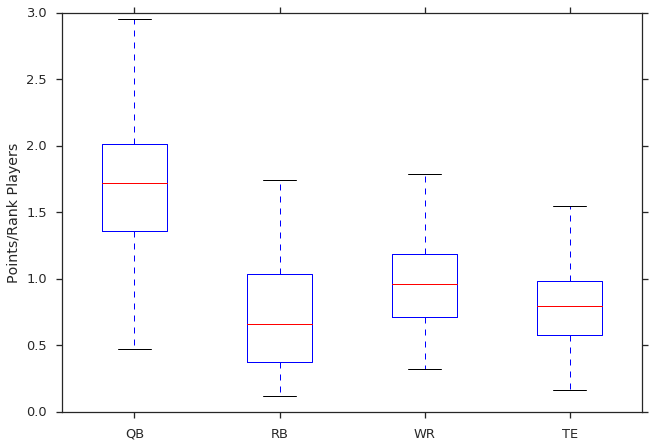

In [15]:
ratio_list = []
max_rank = max(player_rank_dict.values())
for f in [frame_qb, frame_rb, frame_wr, frame_te]:
    players = [x for x in player_rank_dict if x in player_points_dict and x in f['Player'].values]
    points = np.array([player_points_dict[x] for x in players])
    ranks = np.array([max_rank - player_rank_dict[x] for x in players])
    
    ratios = (points+1)/(ranks+1)
    named_ratios = pd.Series(data = ratios, index = players)
    named_ratios.sort(ascending=False)
#     print(named_ratios)
    ratio_list.append(ratios)
plt.boxplot(ratio_list, showfliers=False, sym='.');
plt.xticks(range(1,5), ['QB', 'RB', 'WR', 'TE']);
plt.ylabel('Points/Rank Players')

### Top 50

/gpfs/data01/glasslab/home/jtao/software/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


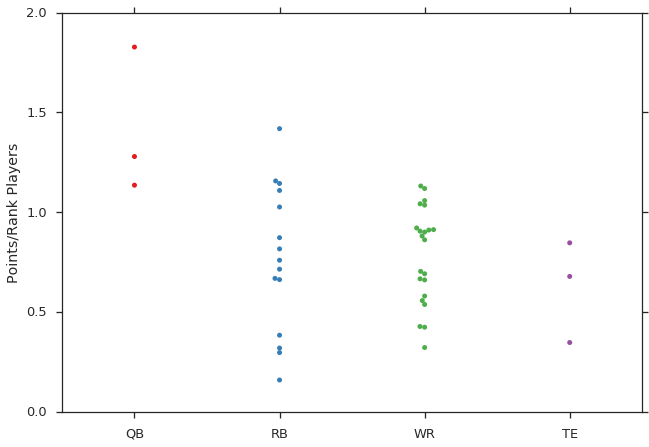

In [16]:
ratio_list = []
position_list = []
max_rank = max(player_rank_dict.values())
frames = [frame_qb, frame_rb, frame_wr, frame_te]
positions = ['QB', 'RB', 'WR', 'TE']
for i in range(len(positions)) :
    f = frames[i]
    players = [x for x in player_rank_dict if x in player_points_dict and x in f['Player'].values and player_rank_dict[x] < 50]
    points = np.array([player_points_dict[x] for x in players])
    ranks = np.array([max_rank - player_rank_dict[x] for x in players])
    
    ratios = (points+1)/(ranks+1)
    named_ratios = pd.Series(data = ratios, index = players)
    named_ratios.sort(ascending=False)
    
    ratio_list = ratio_list + list(ratios)
    position_list = position_list + [positions[i]] * len(ratios)
sns.swarmplot(position_list, ratio_list);
# plt.xticks(range(1,5), ['QB', 'RB', 'WR', 'TE']);
plt.ylabel('Points/Rank Players')

### Below 50

/gpfs/data01/glasslab/home/jtao/software/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


33
61
64
40


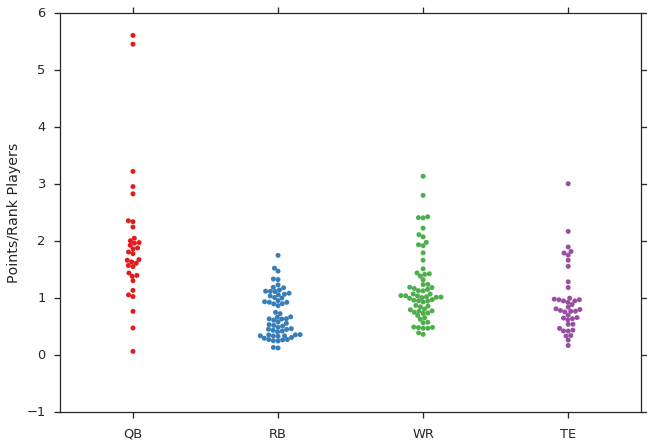

In [17]:
ratio_list = []
position_list = []
max_rank = max(player_rank_dict.values())
frames = [frame_qb, frame_rb, frame_wr, frame_te]
positions = ['QB', 'RB', 'WR', 'TE']
for i in range(len(positions)) :
    f = frames[i]
    players = [x for x in player_rank_dict if x in player_points_dict and x in f['Player'].values and player_rank_dict[x] > 50]
    points = np.array([player_points_dict[x] for x in players])
    ranks = np.array([max_rank - player_rank_dict[x] for x in players])
    
    ratios = (points+1)/(ranks+1)
    named_ratios = pd.Series(data = ratios, index = players)
    named_ratios.sort(ascending=False)
    print(len(ratios))
    ratio_list = ratio_list + list(ratios)
    position_list = position_list + [positions[i]] * len(ratios)
sns.swarmplot(position_list, ratio_list);
# plt.xticks(range(1,5), ['QB', 'RB', 'WR', 'TE']);
plt.ylabel('Points/Rank Players')

## Depth of Position

/gpfs/data01/glasslab/home/jtao/software/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


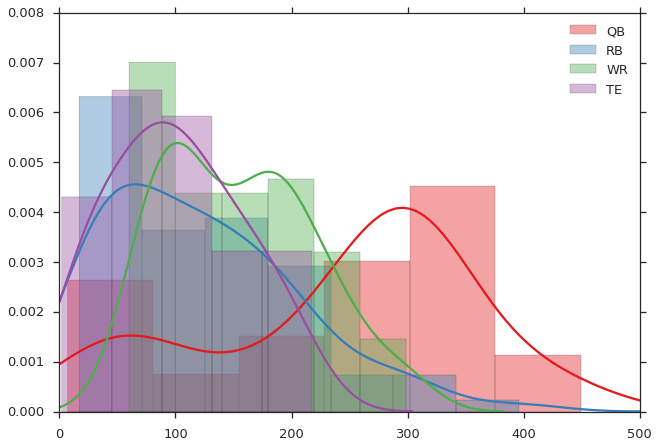

In [20]:
frames = [frame_qb, frame_rb, frame_wr, frame_te]
positions = ['QB', 'RB', 'WR', 'TE']
for i in range(len(positions)) :
    f = frames[i]
    players = [x for x in player_rank_dict if x in player_points_dict and x in f['Player'].values]
    points = np.array([player_points_dict[x] for x in players])
    sns.distplot(points, label = positions[i])
    plt.xlim(0,500)
plt.legend()

## Where are the sleepers?

164.9 113 Sam Bradford, MIN
83.6 25 Terrance West, BAL
106.1 53 LeGarrette Blount, PHI
110.7 55 James White, NE
117.7 66 Eddie Lacy, SEA
119.2 40 Matt Forte, NYJ
120.9 69 Thomas Rawls, SEA
129.2 76 Rex Burkhead, NE
140.2 82 Jacquizz Rodgers, TB
141.2 82 Jeremy Hill, CIN
148.4 96 Jamaal Williams, GB
153.4 95 Jamaal Charles, DEN
151.6 55 Shane Vereen, NYG
161.3 111 DeAndre Washington, OAK
167.0 99 Latavius Murray, MIN
168.0 115 Jonathan Williams, FA
172.9 120 D'Onta Foreman, HOU
133.6 82 Jason Witten, DAL
145.6 57 C.J. Fiedorowicz, HOU
150.8 94 Cameron Brate, TB
158.8 106 Julius Thomas, MIA
173.7 120 Evan Engram, NYG
173.9 111 Charles Clay, BUF
87.0 30 Delanie Walker, TEN
100.8 47 Kenny Britt, CLE
110.3 59 Mike Wallace, BAL
121.3 69 Ted Ginn, NO
120.9 68 Marvin Jones, DET
126.0 41 Corey Davis, TEN
133.7 75 Kevin White, CHI
142.9 52 Cole Beasley, DAL
157.8 86 Kenny Stills, MIA
163.3 93 Cooper Kupp, LAR
161.7 105 Josh Doctson, WAS
167.1 108 Kenny Golladay, DET
168.2 117 Marqise Lee, JAX
17

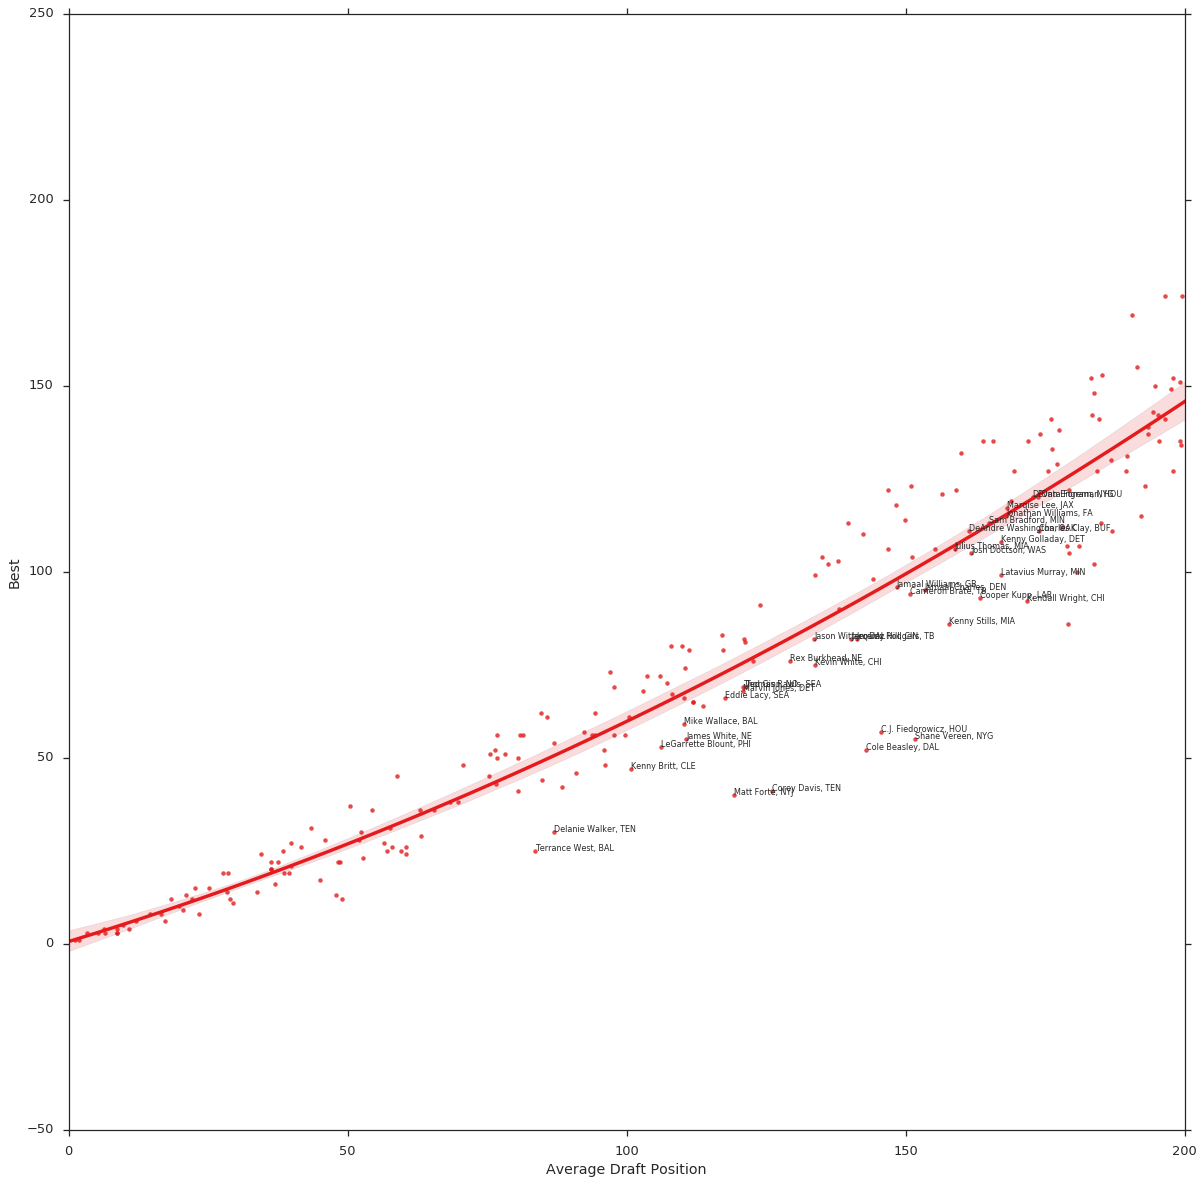

In [18]:
plt.figure(figsize=(20,20))
threshold = 50
avg_ranks = rankings_2017[rankings_2017['Avg']< 200]['Avg'].values
best_ranks = rankings_2017[rankings_2017['Avg']< 200]['Best'].values
players = rankings_2017[rankings_2017['Avg']< 200]['Player'].values
sns.regplot(avg_ranks,best_ranks,order = 2)
ax = plt.gca()

for i in range(len(players)):
    avg = avg_ranks[i]
    best = best_ranks[i]
    player = players[i]
    
    if avg - best> threshold and avg < 175:
        print(avg, best, player)
        ax.annotate(xy=(avg,best), s=player, size=8)

plt.xlim(0, 200)
plt.xlabel('Average Draft Position')
plt.ylabel('Best')
ax.set_aspect((ax.get_xlim()[1] - ax.get_xlim()[0])/(ax.get_ylim()[1] - ax.get_ylim()[0]))